In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import re
from pprint import pp

In [2]:
def lp2p(p):
    return np.exp(p)*100

def p2lp(p):
    return np.log(p / 100)

In [3]:
haz_dict = {
    "Biological": {
        "Aggressive Animals": "Allergies, Bites, Scratches, Kicks, Disease\n",
        "Bacterial & Viral": "Food (Gastro-Intestinal Infections), Air (Cold/Flu) & Water Borne (Legionella), Human/Animal Waste - Gastro-Intestinal Infections (Guano)\n",
        "Decomposing Wildlife": "Disease spread (fleas & ticks)\n",
        "Fungal Spores": "Mouldy Building Materials, Decaying Vegetable Matter, Rotting Waste Material\n"
    },
    "Chemical": {
        "Airborne Particles": "Dust, Fumes, Vapour, Inhalation of fibres (asbestos), Hydrogen Sulphide\n",
        "Asphyxiation": "Nitrogen, Benzene, Halon, Argon, Oxygen Deficiency (Confined Space Work)\n",
        "Carcinogen": "Asbestos, Oil, Condensate Vapour, Benzene\n",
        "Discharge from Vessels": "Land, Sea, Air\n",
        "Flammable": "Flashpoint\n",
        "Hazardous Substance": "Benzene, Nitrogen\n",
        "Irritant": "Mineral Fibre (Rockwool), Acid, Caustic\n",
        "Toxic": "Mercury, Chlorine, Hydrogen Sulphide (H2S)\n"
    },
    "Electrical": {
        "Electrical Arching": "High Current\n",
        "Electrical Spark": "Equipment Condition,\u00a0EX Equipment\n",
        "Equipment": "Cables, High/Low Voltage, Non-IS Equipment, Non-standard Modifications\n",
        "Portable Tools": "Serviceability / Maintenance Level\n",
        "Static": "Equipment Condition\n",
        "Stored/Induced Electrical Charge": "Uninterrupted Power Supply\n"
    },
    "Environment": {
        "Emissions": "Unauthorised Emissions\n",
        "Light & Noise Pollution": "Local Community Impact, Light Positioning\n",
        "Spills": "Oil and/or Chemical to Deck, Sea or Land, Slips\n",
        "Waste": "NORM, General Waste, Contaminated Material, Segregation, Authorisation\n"
    },
    "Gravity": {
        "Dropped Object/Potential Dropped Object": "Deflection, Sliding, Bouncing, Lift Equipment Failure,\u00a0Collapse, Stored Energy,\u00a0Structural Failure\n",
        "Falling Person": "Suspension Trauma, Safety Equipment Failure, Collapse\n",
        "Overloading": "Shearing, Load Bearing Equipment Failure\n",
        "Snagging Equipment": "Sharp Edges, Protection Failure\n"
    },
    "Human Factors": {
        "Competence Levels": "Knowledge, Aptitude, Training, Experience, New/ Unfamiliar Equipment\n",
        "Design": "Legibility, Confusing Signs/ Indications, Complexity\n",
        "Ergonomics": "Body Positioning (Muscular Fatigue), Task Duration, Rests, Equipment, Manual Handling\n",
        "Human Error Potential": "Time Pressure, Milestone Achievement, Job Security, Tiredness, Ill-Health\n",
        "Individual Capability": "Young Persons, Pregnant or Nursing Women, Physical and Mental Health\n",
        "Lone Working": "Communication, Equipment Use, Manual Handling, Emergency Notification\n",
        "Roles & Responsibilities": "Unclear Procedures, Lack of Information, Conflicting Roles\n",
        "Task": "Repetitive, Duration, Attention Required,\u00a0Safety Critical\n",
        "Working Environment": "Temperature, Humidity, Ventilation, Light, Posture, Space, Weather\n",
        "Working Hours": "Long Hours, Routine/ Repetitive Work, Fatigue, Prolonged Concentration\n"
    },
    "Major Accident Hazards": {
        "Chemical or Dangerous Substance Release": "Uncontrolled release hazardous substances, e.g. H2S or chlorine\n",
        "Collision with Installation": "Ship or aircraft\n",
        "Dropped Object": "Large dropped or swinging object\n",
        "Explosion": "Uncontrolled hydrocarbon release, Uncontrolled release of pressure, unnecessary scaffolding in hydrocarbon-containing areas\n",
        "Failure or Breach of Safety & Environmental Critical Element (SECE)": "E.G. TR integrity compromised (open or damaged door on TR), EER (damaged lifeboat and escape equipment), dive support, shutdown system failure, fire and gas system failure, scaffold blocking F&G heads, loss of dynamic positioning\n",
        "Fire": "Uncontrolled hydrocarbon release with source of ignition, Hot surfaces, Hot work, Non-Ex or faulty Ex equipment, Galley or laundry fire\n",
        "Hydrocarbon Release": "Release from cargo tanks or vessels, leaking flange or pipework or damaged small-bore tubing\n",
        "Loss of Buoyancy / Stability": "Ballasting system failures, Loading and stability errors, Loss of water tight integrity (tank, hull piping failure), Compartment flooding\n",
        "Loss of Mechanical Integrity": "Overloading of lifting equipment or load bearing members, Excessive vibration, Excessive corrosion, Anything else with the potential to cause collapse or weakened integrity\n",
        "Loss of Well Control": "Uncontrolled flow from well bore or annulus, Leak from flexible hoses or small-bore tubing, Failure of any well barrier (mud over-balance, BP, Xmas Tree)\n",
        "Major Environmental Spill to Sea": "Leakage of oil or chemicals from pipework, vessels or machinery\n",
        "Structural Impairment": "Strucutural integrity of system or asset compromised through mechanical damage (large dropped or swinging objects, vibration) or corrosion (walkways, handrails, gratings)\n"
    },
    "Mechanical": {
        "Equipment Failure": "Jacking Equipment, Hand Tools, Doors, Hatches, Gratings, Brackets\n",
        "Mechanical Handling Equipment": "Trolleys, Stands, Surfaces, Weight of Load, Load Route\n",
        "Rotating Equipment": "Serviceability / Maintenance Level\n",
        "Stored Mechanical Energy": "Compressed Springs\n"
    },
    "Motion": {
        "Access & Egress": "Congestion, Confined Space, Restricted Movement, Entrapment\n",
        "Collision Impact": "Sharp or Abrasive Object, Trapping, Stored Energy\n",
        "Discharges": "Exhausts, Pipes\n",
        "Friction": "Lubricants\n",
        "Rotating Equipment": "Projectiles, Snagging\n",
        "Slips, Trips and Falls": "Hoses, Pipes, Valves, Stairs, Steps, Excavations\n",
        "Transport": "Aircraft,\u00a0Vessels, Vehicles (Forklifts), ROVs\n",
        "Vibration": "HAVS,\u00a0Erosion\n"
    },
    "Pressure": {
        "Equipment Failure": "Hoses, Small Bore Tubing, Pipework, Air Tools, Valves, Wireline\n",
        "HP/LP Interfaces": "Pressure Regulation\n",
        "Pressurised Systems": "Gas, Compressed Air, Fluid, Trapped Pressure, Bottled Gases, Projectiles, Hoses\n",
        "Release of Pressure": "Over Pressurisation, Pressure Line Release (Whip Checks)\n",
        "Trapped Pressure": "Hydrates, Deflections\n",
        "Vacuum": "Pressure Difference\n"
    },
    "Radiation": {
        "Electronic Magnetic Radiation": "HV Cables, Switch Rooms\n",
        "Ionising Radioactive Sources": "Nucleonics\n",
        "Lasers": "Positioning (Eye Damage)\n",
        "Microwave & Radiowave": "Line of Sight Dishes\n",
        "NORM": "Pipes, Vessels, Valves - Inhalation, Ingestion\n",
        "UV & IR Radiation": "Arc welding, Sunlight/Welding (Skin Burning), Heat Sources (Eye Damage)\n",
        "X-Ray": "Positioning (Radiation Exposure)\n"
    },
    "Safety Systems": {
        "Area Zone Classification Breach": "Explosive Atmospheres\u00a0(ATEX) Zone (1, 2, 3 or 20, 21, 22)\n",
        "Safety & Environmentally Critical Element (SECE) Impairment": "Communication Equipment, Escape Arrangements, Active Fire Protection, Hydrocarbon Containment, Blowdown or Relief Systems, Drains & Vents, Emergency Power & Lighting, Emergency Shutdown Systems, HVAC, Navigational Aids, PFP, Well Control Equipment, TR, Dynamic Positioning, F&G Detection Systems, Asset Integrity, Diving Systems, Critical Instrumentation\n"
    },
    "Sound": {
        "Excessive Noise": "Loss of/ Limited Communication, Long Term Health Effects, Noise Pollution, High or Low Frequency\n",
        "Vibration": "Hand Arm Vibration (HAVS), Duration of Hand Tool Use\n"
    },
    "Temperature": {
        "Cold Surface": "Nitrogen Operations, Cold Liquid, Ice\n",
        "Explosion": "Pyrotechnics, Non IS Equipment, Explosives, Pyrophoric Scale, Ignition Source\n",
        "Fire": "Naked Flame, Heat Transfer\n",
        "Hot Liquid": "Oil, Chemical, Flash Point, Flammable Atmosphere\n",
        "Hot Surface": "Heat Transfer\n",
        "Spontaneous Combustion": "Pyrophoric Scale\n"
    }
}

In [4]:
lsr_dict = {
    "Bypassing Safety Control": "Obtain authorisation before overriding or disabling safety controls. I understand and use safety critical equipment and procedures which apply to my task. I obtain authorisation before disabling or overriding safety equipment, deviating from procedures, crossing a barrier. Safety-critical controls include the following. Equipment (such as fire and explosion protection and mitigation systems, guards, interlocks, alarms and safety-critical monitoring equipment) whose purpose is to prevent a fatality or other major accident, limit the consequences of a major accident, or whose failure could cause or contribute substantially to a fatality or other major accident. Procedures that if not performed correctly or at the right time could result in a fatality or other major accident.",
    "Confined Space": "Obtain authorisation before entering a confined space. I confirm energy sources are isolated. I confirm the atmosphere has been tested and is monitored. I check and use my breathing apparatus when required. I confirm there is an attendant standing by confirming there is a rescue plan is in place, and obtaining  authorisation to enter. A confined space, such as a vessel, tank, pipe, cellar or excavation, can contain explosive gas, toxic or asphyxiating atmosphere or other dangers such as energy releases, lack of oxygen, exposure to hazardous chemicals, things that can fall on you or crush you, or that you can fall from. Authorised access keeps you safe. Organisations should determine if any work involving excavations or trenches creates confined space conditions and ensure necessary work authorisation and controls.",
    "Driving Safety": "Follow safe driving rules. This means the following. Always wear a seatbelt. Do not exceed the speed limit, and reduce speed appropriately for road conditions. Do not use phones or operate devices while driving. Be fit, rested and fully alert while driving. Follow journey management requirements. The driver and passengers should take responsibility for each other’s safety, including ensuring all occupants are wearing a seatbelt. Fitness for duty means assuring that an individual can complete a task safely and without unacceptable risk to themselves or other. This includes not being under the influence of drugs and alcohol.",
    "Energy Isolation": "Verify isolation and zero energy before work begins. I have identified all energy sources. I confirm that hazardous energy sources have been isolated, locked, and tagged. I have checked there is zero energy and tested for residual or stored energy. Energy isolation separates people from hazards such as electricity, pressure and energised equipment. Energy isolation also provides protection from potential energy sources e.g. positioning valves to prevent tanks filling with materials due to gravity. Any stored energy (e.g., hydraulic or pneumatic power) should also be dissipated before the work starts.",
    "Hot Work": "Control flammables and ignition sources. I identify and control ignition sources. Before starting any hot work I confirm flammable material has been removed or isolated, I obtain authorisation. Before starting hot work in a hazardous area I confirm that a gas test has been completed, and gas will be monitored continually. Hot work includes any work that creates an ignition source performed in an area which potentially contains hydrocarbons or flammable materials. Ignition sources are open flames or sources of heat that could ignite materials in the work area such as welding, grinding, smoking, torching, (un)loading of hazardous materials, internal combustion engines, chemical reactions, batteries, etc. Hazardous areas are defined in the UK Dangerous Substances and Explosive Atmospheres Regulations 2002 (DSEAR) as any place in which an explosive atmosphere may occur in quantities such as to require special precautions to protect the safety of workers.",
    "Line of Fire": "Keep yourself and others out of the line of fire. I position myself to avoid moving objects, vehicles, pressure releases, dropped objects. I establish and obey barriers and exclusion zones. I take action to secure loose objects and report potential dropped objects. Other rules focus on specific activities, whereas this Rule is intended to raise personal awareness of struck-by and caught in-between hazards. Line of fire hazards are not always obvious or constant and can be introduced as the task progresses (e.g. underground and overhead powerlines, pipelines, objects under pressure, stored energy, lines under tension, poorly supported excavations, shifting cargo, moving equipment). At all times individuals need to continually monitor their surroundings and position themselves to avoid being in the line of fire. This includes ensuring they are visible to vehicle drivers and equipment operators. Individuals recognise when they create a line of fire hazard and put others or themselves in the line of fire",
    "Safe Mechanical Lifting": "Plan lifting operations and control the area. I confirm that the equipment and load have been inspected and are fit for purpose. I only operate equipment that I am qualified to use. I establish and obey barriers and exclusion zones. I never walk under a suspended load. Lifting operations need to be planned and performed by competent personnel using certified equipment. To protect people around suspended loads and any mechanical lifting operation, access should be controlled through physical barriers and exclusion zones. When mechanically lifting people (e.g. manriding, man baskets, personnel transfer, mobile elevated work platform), organisations should provide equipment which is designed and certified specifically for lifting people.",
    "Work Authorisation": "Work with a valid permit when required. I have confirmed if a permit is required. I am authorised to perform the work. I understand the permit. I have confirmed that hazards are controlled and it is safe to start. I stop and reassess if conditions change. Work authorisation is more than just a person in charge signing a Permit to Work form: it is seeking and having authorisation to start, resume, or hand-over a task. The person in charge of the work confirms that it is safe to start, that controls are in place and effective, and the task can be performed as planned.",
    "Working at Height": "Protect yourself against a fall when working at height. I inspect my fall protection equipment before use. I secure tools and work materials to prevent dropped objects. I tie off 100% to approved anchor points while outside a protected area. Working at height outside a protected area (such as an elevated work area not enclosed by hand rails) requires the use of approved fall protection equipment secured to an approved anchor point. Other considerations for working at height include ladders, work over water, rope access, floor openings, access hatches, and inspection pits. Floor openings should be protected with physical barriers to prevent falls. Preventing objects from falling from height and using physical barriers below working area keeps you and people working below you safe. IOGP recommends that companies define working at height as work at or above 1.8m/6ft, unless local legislation requires a lower height. Scaffolds should be properly constructed, inspected and certified."
}

In [5]:
df = pd.read_csv('Data\logprobs_GD_002_boosted_2024-07-24.csv')

entity = 'hazard'
lp = df[f'logprobs_{entity}']
df.head(10)

,barrier,logprobs_barrier,barrier_retries,hazard,logprobs_hazard,hazard_retries,lsr,logprobs_lsr,lsr_retries,subhazard,...,safe/unsafe,act/condition,name,comments from annotator,barrier_labels,observation,incorrect_lsr_labels,incorrect_barrier_labels,incorrect_hazard_labels,incorrect_subhazard_labels
0,['process containment'],"{""{\n"": {""logprob"": -0.0013736843, ""top_logpro...",0.0,"['biological', 'environment']","{""{\n"": {""logprob"": -0.28220835, ""top_logprobs...",0.0,['confined space'],"{""{\"""": {""logprob"": -0.0061224177, ""top_logpro...",0.0,"['bacterial & viral', 'waste']",...,['Unsafe'],['Condition'],"['Ma', 'Al']","[""Depending on the circumstances, this is not ...",['inspections'],"Whilst answering natures call, it became appar...",[],[],[],[]
1,['following procedures'],"{""{\n"": {""logprob"": -0.0068748603, ""top_logpro...",0.0,"['biological', 'safety systems']","{""{\n"": {""logprob"": -0.14453624, ""top_logprobs...",0.0,['work authorisation'],"{""{\"""": {""logprob"": -0.0025864814, ""top_logpro...",0.0,"['bacterial & viral', 'safety & environmentall...",...,"['Unsafe', 'Safe']","['Act', 'Condition']","['Al', 'Gu']",[],"['following procedures', 'protection systems']",During preparation works to change the supply ...,[],[],[],[]
2,['following procedures'],"{""{\n"": {""logprob"": -0.0013148818, ""top_logpro...",0.0,['radiation'],"{""{\n"": {""logprob"": -0.3368398, ""top_logprobs""...",0.0,['work authorisation'],"{""{\"""": {""logprob"": -0.0016299557, ""top_logpro...",0.0,['x-ray'],...,['Safe'],['Act'],"['An', 'Ro']",['Work control - restricted access'],"['following procedures', 'inspections']",Good use of barriers to restrict access into w...,[],[],[],[]
3,"['following procedures', 'inspections']","{""{\n"": {""logprob"": -0.0016217416, ""top_logpro...",0.0,"['chemical', 'environment']","{""{\n"": {""logprob"": -0.11103185, ""top_logprobs...",0.0,['energy isolation'],"{""{\"""": {""logprob"": -0.00853916, ""top_logprobs...",0.0,"['discharge from vessels', 'spills']",...,['Safe'],['Act'],"['Ma', 'Da']",[],"['following procedures', 'process containment']",Observed team member de-canting oil from Mud p...,[],[],[],[]
4,"['following procedures', 'inspections', 'alarm...","{""{\n"": {""logprob"": -0.0012304692, ""top_logpro...",0.0,['safety systems'],"{""{\n"": {""logprob"": -0.07506516, ""top_logprobs...",0.0,['hot work'],"{""{\"""": {""logprob"": -0.002960585, ""top_logprob...",0.0,['area zone classification breach'],...,['Safe'],['Act'],"['Gu', 'Ro']",[],"['emergency response', 'authorising equipment'...",Observed work party conducting hot work. Fire ...,[],[],['fire'],[]
5,['following procedures'],"{""{\n"": {""logprob"": -0.0005632806, ""top_logpro...",0.0,['biological'],"{""{\n"": {""logprob"": -0.055982135, ""top_logprob...",0.0,"['confined space', 'work authorisation']","{""{\"""": {""logprob"": -0.0078115044, ""top_logpro...",0.0,['bacterial & viral'],...,['Unsafe'],['Condition'],"['Al', 'Gu']","[""Whilst unpleasant, this isn't really a safet...",[],Upon returning to the TR I made to pick up a s...,[],[],[],[]
6,['following procedures'],"{""{\n"": {""logprob"": -0.0012110684, ""top_logpro...",0.0,"['chemical', 'safety systems']","{""{\n"": {""logprob"": -0.050538283, ""top_logprob...",0.0,[],"{""{\"""": {""logprob"": -0.012411937, ""top_logprob...",0.0,[],...,['Safe'],['Act'],"['An', 'Da']",[],"['following procedures', 'inspections']",OP observed conducting Biocide dosing operatio...,[],[],[],[]
7,['following procedures'],"{""{\n"": {""logprob"": -0.0035919948, ""top_logpro...",0.0,['human factors'],"{""{\n"": {""logprob"": -0.0560599, ""top_logprobs""...",0.0,['work authorisation'],"{""{\"""": {""logprob"": -0.008593415, ""top_logprob...",0.0,['competence levels'],...,['Safe'],['Act'],"['An', 'Ro']",['Work control - toolbox talk'],['following procedures'],Had discussion with construction crew who were...,[],[],[],[]
8,"['following procedures', 'authorising equipment']","{""{\n"": {""logprob"": -0.0

In [6]:
pp(ast.literal_eval(df.iloc[9].logprobs_hazard))

{'{\n': {'logprob': -0.068122804,
         'top_logprobs': [['{\n', -0.068122804],
                          ['{"', -2.7237854],
                          ['\n', -8.422371]]},
 ' ': {'logprob': -0.00013691289,
       'top_logprobs': [[' ', -0.00013691289],
                        ['  ', -9.460367],
                        ['   ', -9.961601]]},
 ' "': {'logprob': -1.2664457e-06,
        'top_logprobs': [[' "', -1.2664457e-06],
                         [' ', -13.758958],
                         [' {\n', -17.179201]]},
 'h': {'logprob': -5.5122365e-07,
       'top_logprobs': [['h', -5.5122365e-07],
                        ['H', -15.50422],
                        ['s', -16.493444]]},
 'azard': {'logprob': -1.640531e-05,
           'top_logprobs': [['azard', -1.640531e-05],
                            ['az', -11.0244875],
                            ['azar', -16.269701]]},
 '":': {'logprob': -0.00025299523,
        'top_logprobs': [['":', -0.00025299523],
                         ['":["',

In [7]:
x = lp.loc[1]
x = ast.literal_eval(x)
pp(x)


{'{\n': {'logprob': -0.14453624,
         'top_logprobs': [['{\n', -0.14453624],
                          ['{"', -2.0086873],
                          ['\n', -7.818734]]},
 ' ': {'logprob': -0.00013989297,
       'top_logprobs': [[' ', -0.00013989297],
                        ['  ', -9.344167],
                        ['   ', -10.273442]]},
 ' "': {'logprob': -3.1281633e-07,
        'top_logprobs': [[' "', -3.1281633e-07],
                         [' ', -15.171455],
                         ['\t', -17.900482]]},
 'h': {'logprob': 0.0,
       'top_logprobs': [['h', 0.0], ['H', -18.062634], [' h', -20.060133]]},
 'azard': {'logprob': -7.822647e-06,
           'top_logprobs': [['azard', -7.822647e-06],
                            ['az', -11.7715],
                            ['azar', -16.706858]]},
 '":': {'logprob': -0.00025907462,
        'top_logprobs': [['":', -0.00025907462],
                         ['":["', -8.271149],
                         ['":[', -13.097107]]},
 ' [\n': {'lo

In [8]:
res = []

for d in lp:
    av = 0
    d = ast.literal_eval(d)
    for value in d.values():
        if not isinstance(value, dict):
            continue
        else:
            av += lp2p(value['logprob'])
    av /= len(d)
    res.append(av)


In [9]:
low_values = [x for x in res if x < 10]
print(low_values)

[0.0]


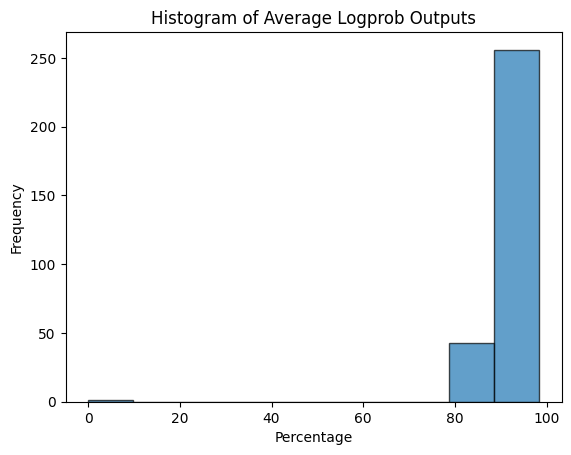

In [10]:
def lp_hist(res, title = 'Histogram of Average Logprob Outputs', yscale = None):
    plt.hist(res, bins=10, edgecolor='black', alpha=0.7)

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Percentage')
    plt.ylabel('Frequency')

    plt.ylim([0,yscale])

    # Show the plot
    plt.show()

lp_hist(res)

In [11]:
square_brackets_pattern = re.compile(r'[\[\]:]')
braces_pattern = re.compile(r'[\{\}:]')
category_name_pattern = re.compile(r'hazard:', re.IGNORECASE)
newline_pattern = re.compile(r'\n')

# Filter function to remove unwanted tokens
def filter_tokens(token):
    # Remove square brackets
    token = square_brackets_pattern.sub('', token)
    # Remove braces
    token = braces_pattern.sub('', token)
    # Remove category name
    token = category_name_pattern.sub('', token)
    # Remove new line markers
    token = newline_pattern.sub('', token)
    return token.strip()  # Remove any leading or trailing whitespace

In [12]:
t = {}

flag = False
output = {}
for key, value in x.items():
    if ']' in key:
        flag = False
    if flag:
        output[key] = value['logprob']
    if '[' in key:
        flag = True


pp(output)

{'   ': -7.77952e-05,
 'Bi': -0.0045865346,
 'ological': -1.3856493e-06,
 '",\n': -0.0163425,
 'Safety': -0.32296818,
 ' Systems': -8.776276e-06,
 '"\n': -0.07585289}


In [13]:
output = {key: lp2p(value) for key, value in output.items()}
pp(output)

{'   ': 99.9922207825968,
 'Bi': 99.54239674876209,
 'ological': 99.99986143516601,
 '",\n': 98.37903141637196,
 'Safety': 72.39968915824815,
 ' Systems': 99.99912237625114,
 '"\n': 92.69525605207988}


In [14]:
res = []
output_dicts = []
flag = False

for d in lp:
    av = 0
    d = ast.literal_eval(d)
    new_dict = {}
    for key, value in d.items():
        if not isinstance(value, dict):
            continue
        else:
            if ']' in key:
                flag = False
            if flag:
                av += lp2p(value['logprob'])
                new_dict[key] = value['logprob']
            if '[' in key:
                flag = True
    av /= len(d)
    output_dicts.append(new_dict)
    res.append(av)
    flag = False

print(res)
pp(output_dicts[7])

[27.809358862120373, 41.43797362309225, 18.18074622555955, 37.58228699580174, 36.347338545656335, 18.179396529947294, 40.88759106677984, 27.594877994152437, 44.65280460610869, 40.08405427142086, 41.80997304610266, 31.35980752255699, 39.589811207566434, 35.30217352710378, 21.091725095866067, 14.200399385239388, 47.5288367413701, 25.579145476007458, 47.168635011826304, 45.89116601417493, 23.378073753444657, 39.12088537150631, 30.28339494283765, 29.440633034408474, 48.24881429104879, 28.669903052284152, 36.32568327552285, 32.11072248012554, 26.67344140898353, 42.562127373813524, 36.80615161824712, 37.54985987711253, 32.422510197348984, 38.68186118180135, 33.80603649913734, 39.69195068103832, 33.116169374132525, 24.47566793229366, 30.093669443461312, 33.78960396267671, 44.507815195002905, 42.860390640140935, 24.31989761032211, 28.937924537068955, 46.53412786213468, 27.446247522771632, 29.11025582088282, 18.14937599001581, 36.7357407848361, 32.706750572724516, 40.928618727954806, 37.8273911

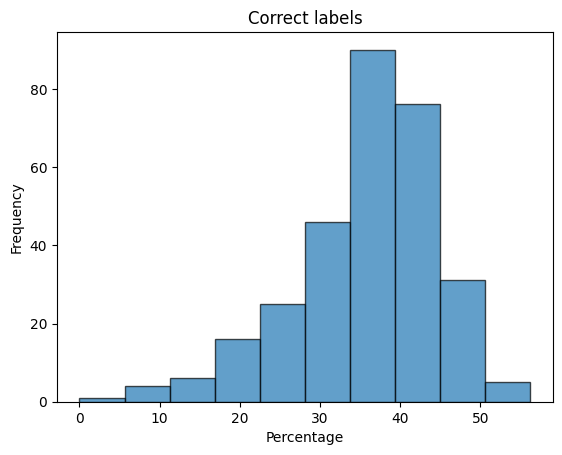

In [15]:
lp_hist(res, 'Correct labels')

In [16]:
def clean_token(token):
    # Remove any internal newline characters
    token = token.replace('\n', '')
    token = token.replace('"', '')
    return token

combined_tokens = []

entity_dicts = {
    'hazard': haz_dict,
    'lsr': lsr_dict
}

for i in output_dicts:
    current_word = ''
    lp_sum = 0.0
    current_dict = {}
    for key, value in i.items():
        key = clean_token(key)
        if key.strip():
            if key.strip() != ',':
                current_word += key
                lp_sum += value
                if 'Fire' in current_word:
                    current_word = current_word.replace('Fire','')
                if current_word in entity_dicts[entity].keys():
                    current_dict[current_word.lower()] = lp_sum
                    current_word = ''
                    lp_sum = 0.0
                
    combined_tokens.append(current_dict)

In [17]:
pp(combined_tokens)

n_labels_boost = 0

for i in combined_tokens:
    n_labels_boost += len(i)


n_labels_sme = 0
for i in df['hazard']:
    i = ast.literal_eval(i)
    n_labels_sme += len(i)
print('---------------------')
print(n_labels_boost)
print(n_labels_sme)


[{'biological': -0.0106220129813, 'environment': -0.027604822},
 {'biological': -0.0045879202493, 'safety systems': -0.322976956276},
 {'radiation': -0.00011792203464},
 {'chemical': -0.0018493484530000001, 'environment': -0.0055240155},
 {'safety systems': -0.06847927848},
 {'biological': -0.000266416793},
 {'chemical': -0.06211286802, 'safety systems': -0.146180663444},
 {'human factors': -0.014997578054000002},
 {'electrical': -0.081657790519,
  'mechanical': -0.158177797242,
  'gravity': -0.04373762},
 {'environment': -0.4477928,
  'mechanical': -0.49213845122365,
  'safety systems': -0.018393199702},
 {'human factors': -0.019791539147999998,
  'safety systems': -0.0026800409680000003},
 {'environment': -0.28684187, 'gravity': -0.24208309},
 {'chemical': -0.030858236871399998, 'safety systems': -0.382752829906},
 {'mechanical': -0.12377780622365, 'gravity': -0.35969356},
 {'temperature': -0.028855745, 'environment': -0.5348819},
 {'sound': -0.005989947},
 {'mechanical': -0.59256450

In [18]:
corr_labels = []
inc_labels = []


for idx, row in df.iterrows():
    for key, value in combined_tokens[idx].items():
        if key.lower() in ast.literal_eval(row[f'{entity}_labels']):
            corr_labels.append((key, value))
        else:
            inc_labels.append((key, value))

In [19]:
print(corr_labels)

[('biological', -0.0106220129813), ('environment', -0.027604822), ('biological', -0.0045879202493), ('radiation', -0.00011792203464), ('chemical', -0.0018493484530000001), ('environment', -0.0055240155), ('biological', -0.000266416793), ('chemical', -0.06211286802), ('human factors', -0.014997578054000002), ('electrical', -0.081657790519), ('gravity', -0.04373762), ('environment', -0.28684187), ('chemical', -0.030858236871399998), ('mechanical', -0.12377780622365), ('temperature', -0.028855745), ('sound', -0.005989947), ('pressure', -0.15986149), ('human factors', -0.4105054303495), ('mechanical', -0.027252720093199997), ('human factors', -0.076262613444), ('radiation', -0.77196853202), ('chemical', -0.0014254306456999999), ('radiation', -0.00016146517), ('mechanical', -0.0014106677273), ('human factors', -0.511981129906), ('chemical', -0.11664860724199999), ('environment', -0.15242511), ('mechanical', -0.0012860265493), ('environment', -0.40638152), ('gravity', -0.064427756), ('radiat

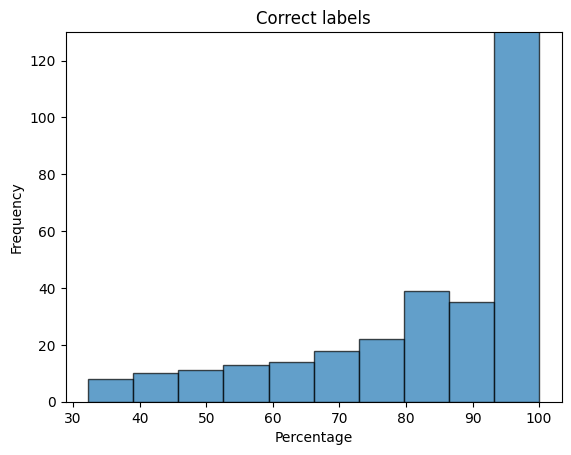

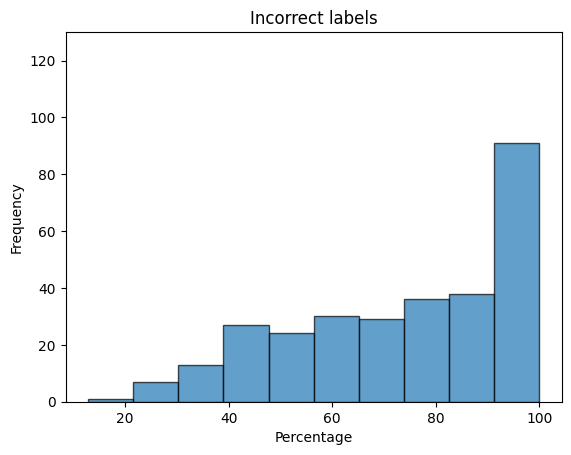

In [20]:
scale = 130
lp_hist([lp2p(x[1]) for x in corr_labels], 'Correct labels', scale)
lp_hist([lp2p(x[1]) for x in inc_labels], 'Incorrect labels', scale)

In [21]:
def label_threshold(list, th):
    cleaned_labels = []
    for i in list:
        current_list = []
        for key, value in i.items():
            if lp2p(value) >= th:
                current_list.append(key)
        cleaned_labels.append(current_list)
    return cleaned_labels

def calc_stats(pred, act):
    tp = 0
    fp = 0
    fn = 0

    for predicted, actual in zip(pred, act):
        predicted_set = set(predicted)
        actual_set = set(actual)

        tp += len(predicted_set & actual_set)
        fp += len(predicted_set - actual_set)
        fn += len(actual_set - predicted_set)

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    return precision, recall


In [22]:
sme_labels = list(df[f'{entity}_labels'])
sme_labels = [ast.literal_eval(x) for x in sme_labels]

boost_labels = list(df[f'{entity}'])
boost_labels = [ast.literal_eval(x) for x in boost_labels]

pp(sme_labels)
pp(boost_labels)

[['human factors', 'biological', 'environment'],
 ['human factors', 'biological'],
 ['radiation'],
 ['chemical', 'human factors', 'safety systems', 'environment'],
 ['temperature'],
 ['human factors', 'biological'],
 ['chemical', 'human factors', 'biological'],
 ['human factors'],
 ['electrical', 'gravity'],
 ['human factors', 'chemical'],
 ['biological'],
 ['biological', 'environment'],
 ['chemical'],
 ['mechanical'],
 ['temperature'],
 ['human factors', 'safety systems', 'sound'],
 ['chemical', 'human factors', 'pressure'],
 ['human factors', 'safety systems'],
 ['radiation'],
 ['chemical', 'human factors', 'biological', 'mechanical'],
 ['radiation'],
 ['chemical', 'major accident hazards'],
 ['human factors', 'radiation'],
 ['human factors', 'gravity', 'mechanical'],
 ['chemical', 'environment'],
 ['major accident hazards', 'mechanical'],
 [],
 ['human factors', 'gravity', 'environment', 'mechanical'],
 ['radiation'],
 ['radiation'],
 ['human factors', 'temperature'],
 ['gravity', '

In [28]:
cleaned_labels = label_threshold(combined_tokens, 30)

print(calc_stats(cleaned_labels, sme_labels))
print(calc_stats(boost_labels, sme_labels))

thresholds = list(range(0, 100, 5))
results = []
n_labels = []


for i in thresholds:
    labels = label_threshold(combined_tokens, i)
    n_labels.append(sum([len(i) for i in labels]))
    results.append(calc_stats(labels, sme_labels))


(0.5254515599343186, 0.5152979066022544)
(0.5194174757281553, 0.5169082125603864)


In [29]:
print(n_labels)

[616, 616, 616, 615, 615, 612, 609, 602, 582, 557, 543, 517, 491, 461, 436, 400, 361, 319, 266, 198]


In [27]:
sum([len(i) for i in cleaned_labels])

609

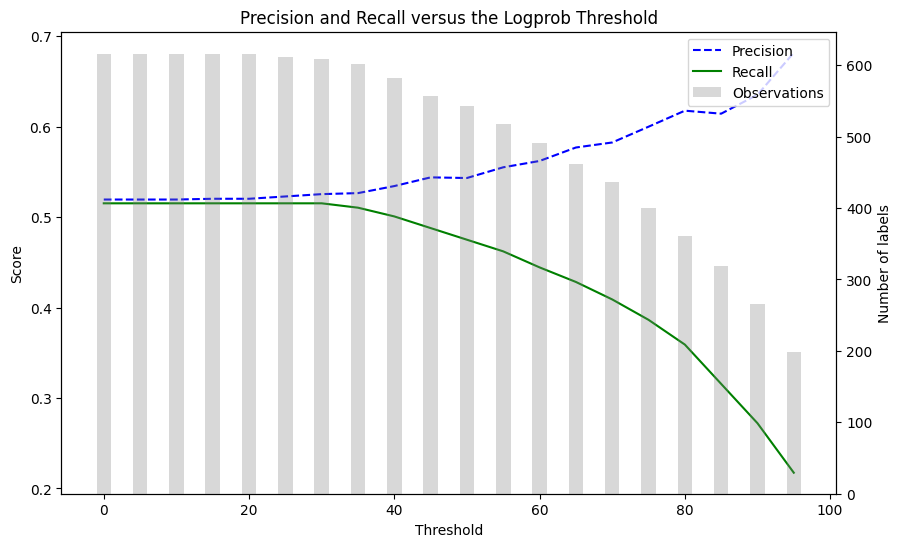

In [35]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot precision
ax1.plot(thresholds, [x[0] for x in results], 'b--', label='Precision')
# Plot recall
ax1.plot(thresholds, [x[1] for x in results], 'g-', label='Recall')

# Add labels and title
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Score')
ax1.set_title('Precision and Recall versus the Logprob Threshold')
ax1.legend(loc='upper left')

# Create a second y-axis for the bar chart
ax2 = ax1.twinx()
ax2.set_ylabel('Number of labels')
ax2.bar(thresholds, n_labels, alpha=0.3, color='gray', width=2, align='center', label='Observations')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

# Highlight the point where precision and recall intersect
# Find the intersection point
# for i in range(1, len(precision_values)):
#     if precision_values[i] <= recall_values[i] and precision_values[i-1] > recall_values[i-1]:
#         ax1.scatter(thresholds[i], precision_values[i], color='red')
#         break

# Add grid and show plot
# ax1.grid(True)
plt.show()


In [ ]:
df[f'lp_average_{entity}'] = res
df.head()

mask_inc = df[f'incorrect_{entity}_labels'] == '[]'
incorrect_entity = df[~mask_inc]
correct_entity = df[mask_inc]

# display(incorrect_haz)

In [ ]:
mask = []

for idx, row in df.iterrows():
    print(f'Testing row {idx}')
    match = True
    i = ast.literal_eval(row[f'{entity}_labels'])
    j = ast.literal_eval(row[f'{entity}'])
    print(f'{i}\n{j}')
    for x in j:
        if x not in i:
            match = False
            # break
    mask.append(match)

Testing row 0
['human factors', 'biological', 'environment']
['biological', 'environment']
Testing row 1
['human factors', 'biological']
['biological', 'safety systems']
Testing row 2
['radiation']
['radiation']
Testing row 3
['chemical', 'human factors', 'safety systems', 'environment']
['chemical', 'environment']
Testing row 4
['temperature']
['safety systems']
Testing row 5
['human factors', 'biological']
['biological']
Testing row 6
['chemical', 'human factors', 'biological']
['chemical', 'safety systems']
Testing row 7
['human factors']
['human factors']
Testing row 8
['electrical', 'gravity']
['electrical', 'mechanical', 'gravity']
Testing row 9
['human factors', 'chemical']
['environment', 'mechanical', 'safety systems']
Testing row 10
['biological']
['human factors', 'safety systems']
Testing row 11
['biological', 'environment']
['environment', 'gravity']
Testing row 12
['chemical']
['chemical', 'safety systems']
Testing row 13
['mechanical']
['mechanical', 'gravity']
Testing r

In [ ]:
print(mask.count(True))
df[mask][[f'{entity}', f'{entity}_labels']]

92


,hazard,hazard_labels
0,"['biological', 'environment']","['human factors', 'biological', 'environment']"
2,['radiation'],['radiation']
3,"['chemical', 'environment']","['chemical', 'human factors', 'safety systems'..."
5,['biological'],"['human factors', 'biological']"
7,['human factors'],['human factors']
...,...,...
279,"['electrical', 'human factors']","['human factors', 'electrical', 'safety systems']"
286,"['chemical', 'environment']","['chemical', 'environment']"
293,"['mechanical', 'pressure']","['pressure', 'mechanical']"
294,['human factors'],"['human factors', 'chemical']"


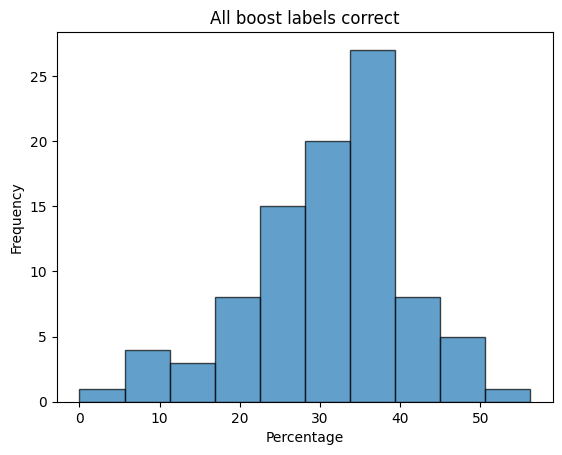

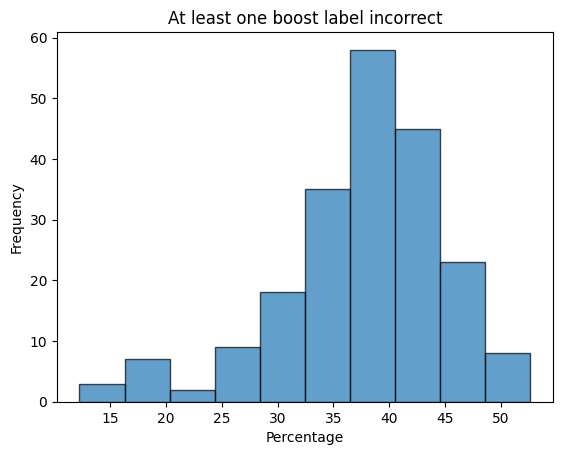

In [ ]:
lp_hist(df[mask][f'lp_average_{entity}'], 'All boost labels correct')
lp_hist(df[[not x for x in mask]][f'lp_average_{entity}'], 'At least one boost label incorrect')
